<a href="https://colab.research.google.com/github/Atanu-2002/cognifyz-Internship-tasks/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd

df = pd.read_csv("d.csv")


In [14]:
# Drop rows with missing target values
df = df.dropna(subset=['Cuisines'])

# Fill other missing values with 'Unknown'
df.fillna('Unknown', inplace=True)


In [15]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = [
    'City', 'Locality', 'Locality Verbose', 'Currency',
    'Has Table booking', 'Has Online delivery', 'Is delivering now',
    'Switch to order menu', 'Rating color', 'Rating text'
]

# Encode each categorical column
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [16]:
from sklearn.preprocessing import MultiLabelBinarizer

df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(', '))  # Make it a list

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Cuisines'])  # Binary label matrix for multi-label classification


In [17]:
df['text'] = df['Restaurant Name'] + " " + df['City'].astype(str) + " " + df['Locality'].astype(str)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['text'])  # Features for ML


In [19]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,text
0,6317637,Le Petit Souffle,162,73,"Third Floor, Century City Mall, Kalayaan Avenu...",171,172,121.027535,14.565443,"[French, Japanese, Desserts]",...,1,0,0,0,3,4.8,0,1,314,Le Petit Souffle 73 171
1,6304287,Izakaya Kikufuji,162,73,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",592,600,121.014101,14.553708,[Japanese],...,1,0,0,0,3,4.5,0,1,591,Izakaya Kikufuji 73 592
2,6300002,Heat - Edsa Shangri-La,162,75,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",308,314,121.056831,14.581404,"[Seafood, Asian, Filipino, Indian]",...,1,0,0,0,4,4.4,1,5,270,Heat - Edsa Shangri-La 75 308
3,6318506,Ooma,162,75,"Third Floor, Mega Fashion Hall, SM Megamall, O...",860,873,121.056475,14.585318,"[Japanese, Sushi]",...,0,0,0,0,4,4.9,0,1,365,Ooma 75 860
4,6314302,Sambo Kojin,162,75,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",860,873,121.057508,14.584450,"[Japanese, Korean]",...,1,0,0,0,4,4.8,0,1,229,Sambo Kojin 75 860


In [21]:
from sklearn.preprocessing import MultiLabelBinarizer

# No need to split if already a list
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Cuisines'])



In [22]:
df['Cuisines'].head()


,Cuisines
0,"[French, Japanese, Desserts]"
1,[Japanese]
2,"[Seafood, Asian, Filipino, Indian]"
3,"[Japanese, Sushi]"
4,"[Japanese, Korean]"


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


In [25]:
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))


In [26]:
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 26 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 105 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/multiclass.py:90: UserWarning: Label not 107 is present in all training examples.
  warnings.warn(


OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [27]:
y_pred = model.predict(X_test)


In [29]:
from sklearn.metrics import classification_report, accuracy_score, hamming_loss


In [30]:
print(classification_report(y_test, y_pred, target_names=mlb.classes_))


                   precision    recall  f1-score   support

          Afghani       0.00      0.00      0.00         4
          African       0.00      0.00      0.00         3
         American       1.00      0.22      0.36        73
           Andhra       0.00      0.00      0.00         2
          Arabian       0.00      0.00      0.00         2
        Argentine       0.00      0.00      0.00         1
         Armenian       0.00      0.00      0.00         0
            Asian       0.00      0.00      0.00        50
     Asian Fusion       0.00      0.00      0.00         1
         Assamese       0.00      0.00      0.00         0
       Australian       0.00      0.00      0.00         1
           Awadhi       0.00      0.00      0.00         0
              BBQ       0.00      0.00      0.00         8
           Bakery       1.00      0.34      0.51       135
         Bar Food       0.00      0.00      0.00        13
          Belgian       0.00      0.00      0.00       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print("Subset Accuracy:", accuracy)


Subset Accuracy: 0.21162912519643792


In [32]:
loss = hamming_loss(y_test, y_pred)
print("Hamming Loss:", loss)


Hamming Loss: 0.010899369592312278


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

# mlb.classes_ holds all cuisine labels in order
cuisines = mlb.classes_

# Store results in a list
results = []

for i, cuisine in enumerate(cuisines):
    precision = precision_score(y_test[:, i], y_pred[:, i], zero_division=0)
    recall = recall_score(y_test[:, i], y_pred[:, i], zero_division=0)
    f1 = f1_score(y_test[:, i], y_pred[:, i], zero_division=0)
    support = sum(y_test[:, i])  # Number of true samples for this cuisine

    results.append({
        'Cuisine': cuisine,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Support': support
    })

import pandas as pd
performance_df = pd.DataFrame(results)
print(performance_df.sort_values(by='Support', ascending=False))


          Cuisine  Precision    Recall  F1-score  Support
100  North Indian   0.813814  0.666667  0.732928      813
34        Chinese   0.734783  0.297012  0.423029      569
49      Fast Food   0.905063  0.324263  0.477462      441
95        Mughlai   0.729730  0.121622  0.208494      222
70        Italian   0.800000  0.050000  0.094118      160
..            ...        ...       ...       ...      ...
104    Patisserie   0.000000  0.000000  0.000000        0
98   New American   0.000000  0.000000  0.000000        0
127    Sri Lankan   0.000000  0.000000  0.000000        0
120     Soul Food   0.000000  0.000000  0.000000        0
125  Southwestern   0.000000  0.000000  0.000000        0

[145 rows x 5 columns]


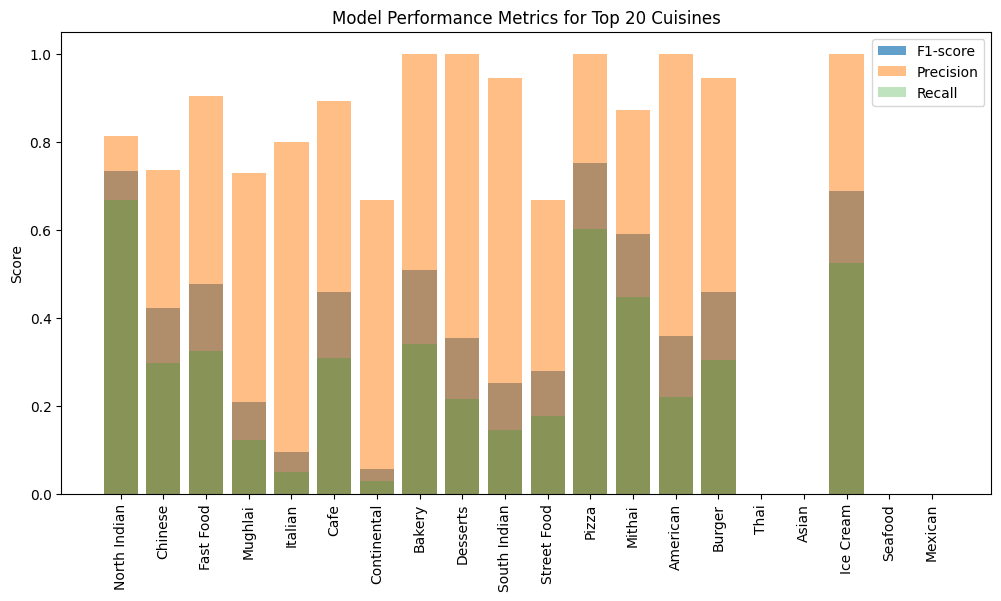

In [34]:
import matplotlib.pyplot as plt

performance_df_sorted = performance_df.sort_values('Support', ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.bar(performance_df_sorted['Cuisine'], performance_df_sorted['F1-score'], alpha=0.7, label='F1-score')
plt.bar(performance_df_sorted['Cuisine'], performance_df_sorted['Precision'], alpha=0.5, label='Precision')
plt.bar(performance_df_sorted['Cuisine'], performance_df_sorted['Recall'], alpha=0.3, label='Recall')
plt.xticks(rotation=90)
plt.ylabel('Score')
plt.title('Model Performance Metrics for Top 20 Cuisines')
plt.legend()
plt.show()
